<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [2]:
# 데이터 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [3]:
# 예시 : 방 개수, 주택 넓이, 층 수, 주택의 상태, 등급을 중요한 컬럼으로 생각해 보자.
df_train = df[["bedrooms", "sqft_living", "floors", "grade", "price"]]

In [4]:
# 확인
df_train

,bedrooms,sqft_living,floors,grade,price
0,3,1180,1.0,7,221900.0
1,3,2570,2.0,7,538000.0
2,2,770,1.0,6,180000.0
3,4,1960,1.0,7,604000.0
4,3,1680,1.0,8,510000.0
...,...,...,...,...,...
21608,3,1530,3.0,8,360000.0
21609,4,2310,2.0,8,400000.0
21610,2,1020,2.0,7,402101.0
21611,3,1600,2.0,8,400000.0


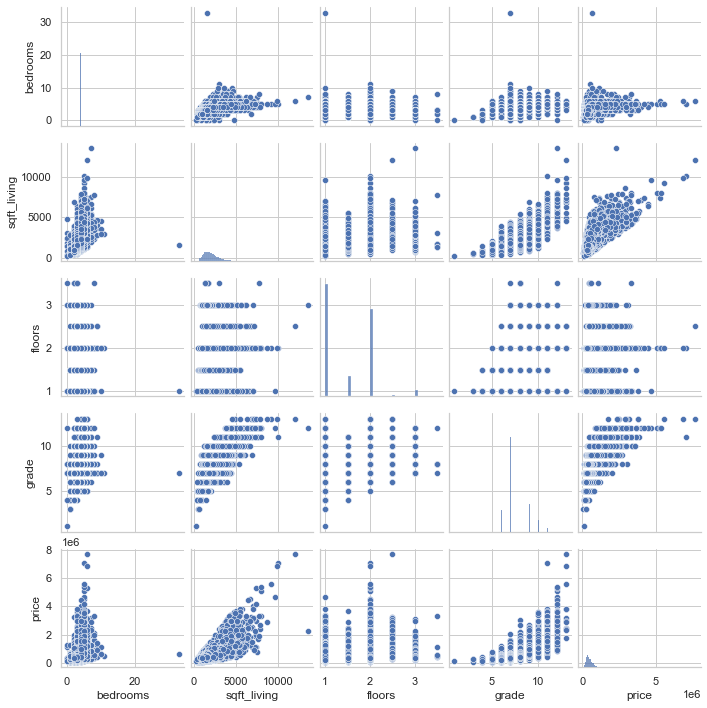

In [5]:
# 시각화로 파악하기
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ["bedrooms", "sqft_living", "floors", "grade", "price"]
sns.pairplot(df[cols], height=2);


# 양의 상관관계/음의 상관관계를 보이는 피쳐로는 sqft_living, grade를 확인할 수 있다.

In [6]:
# 상관계수 확인
df_train.corr()

# sqft_living이 가장 높다 (0.702035)

,bedrooms,sqft_living,floors,grade,price
bedrooms,1.000000,0.576671,0.175429,0.356967,0.308350
sqft_living,0.576671,1.000000,0.353949,0.762704,0.702035
floors,0.175429,0.353949,1.000000,0.458183,0.256794
grade,0.356967,0.762704,0.458183,1.000000,0.667434
price,0.308350,0.702035,0.256794,0.667434,1.000000


### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

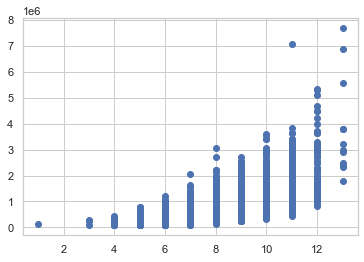

In [7]:
# grade 컬럼과 주택 가격의 관계 양상을 산점도로 확인
import matplotlib.pyplot as plt
plt.scatter(df['grade'], df['price']);

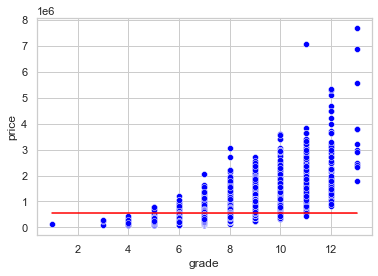

In [8]:
# 기준 모델 생성 -> 평균값으로 설정하기
# 피쳐 : grade & 타깃 : price
x = df['grade']
y = df['price']

# 평균값
predict = df['price'].mean()

# 잔차 & 잔차제곱합
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()


# 시각화
# 기본모델
sns.lineplot(x=x, y=predict, color='red')

# 피쳐와 타깃 - 산점도 활용
sns.scatterplot(x=x, y=y, color='blue');

In [9]:
# 기준 모델의 값
predict

540088.1417665294

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [10]:
# 패키지
from sklearn.linear_model import LinearRegression

# 객체 생성
model = LinearRegression()

# 피쳐와 타깃 -> 학습할 수 있도록 데이터프레임에 담기
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

# 모델 학습 - fit()
model.fit(X_train, y_train)

# grade가 6인 경우 주택가격 예측하기
grade = 6
X_test = [[grade]]
y_pred = model.predict(X_test)

print("주택 등급 : ", grade, "  가격 예측 : ", y_pred[0][0], "$")

주택 등급 :  6   가격 예측 :  194700.3977405005 $


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [11]:
# 다른 grade값에 따른 주택가격 예측하기 1
grade = 7
X_test = [[grade]]
y_pred = model.predict(X_test)

print("주택 등급 : ", grade, "  가격 예측 : ", y_pred[0][0], "$")

주택 등급 :  7   가격 예측 :  403157.9601988797 $


In [12]:
# 다른 grade값에 따른 주택가격 예측하기 2
grade = 5
X_test = [[grade]]
y_pred = model.predict(X_test)

print("주택 등급 : ", grade, "  가격 예측 : ", y_pred[0][0], "$")

주택 등급 :  5   가격 예측 :  -13757.164717878448 $


In [13]:
# grade특성에 대한 회귀계수. 1 grade가 올라갈 때 주택 가격은 208,457.562$ 상승한다.
model.coef_

array([[208457.56245838]])

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [14]:
# 객체 생성
model_living = LinearRegression() 

# 피쳐와 타깃 -> 학습할 수 있도록 데이터프레임에 담기
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

# 모델 학습
model_living.fit(X_train, y_train)

# sqft_living 특성에 대한 회귀계수. 주거 공간이 1sqft 늘어날 수록 주택 가격은 595.94$ 증가한다.
model_living.coef_

array([[280.6235679]])

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

### 6) 

1. 단순선형회귀분석이란 단일 독립변수에 대한 종속변수의 추이를 분석하는 것이다.
2. 단순선형회귀모델은 이런 원리를 사용하여 주어진 feature와 target의 관계를 학습하고 정확한 수치(기울기, 절편)로 나타내는 것을 말한다.
3. target에 영향을 끼치는 feature가 무엇일지 잘 선택하는 것이 중요하다.
4. 객관적인 수치로 명확한 표현이 가능한 양적변수는 회귀분석에 유용하게 사용된다.
5. 질적변수도 더미 코딩을 통해 수치로 변환하거나, 전문가들이나 기존 연구에 의해 완성된 신뢰도 높은 방법으로 연속적 수치로 변환할 수 있다면 얼마든지 사용 가능하다.
6. 시각화를 통해 상관관계를 눈으로 파악하거나, 공분산 혹은 상관계수를 확인해 보거나, 좋은 특성을 분별하는 작업까지 코딩으로 처리하여 정확도를 높이면 좋은 특성을 선택할 수 있다.

### 7) 

1. 최소자승법(Ordinary Least Squares)은 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 벡터를 구하는 방법이다.
2. 분포되어 있는 데이터의 추세선을 그리고자 할 때 주로 사용된다.
3. 추세선과 데이터 벡터의 오차는 다양한 형태로 표현될 수 있지만 가장 보편적이고 쉽게 이해할 수 있는 지표는 잔차 제곱합이다.
4. 우리가 오늘 배웠던 단순선형회귀로만 제한하여 생각해 보자. 그리고 어떤 데이터값의 벡터가 $(x_i, y_i)$ 이고, 단순회귀선의 식이 $ \hat{y_i}=ax_i+b$ 라고 가정해보자.
5. 이 때, $x_1$에 따른 $\hat{y_1}$과 실제 $y_1$의 값은 동일하지 않다.
6. 모든 데이터를 지나도록 일차방정식 선을 그릴 수 있으면 좋겠지만, $\hat{y_1}  \ne y_1$인 것 처럼, 단순선형회귀분석으로는 불가능 한 일이다.
7. 따라서 $(x_i, y_i)$에서 $ \hat{y}=ax+b$ 까지의 거리, 즉 오차를 최소화 할 수 있는 방법을 사용하여 데이터의 분포를 가장 잘 반영하는 직선(회귀선)을 그리는 것으로 최선의 타협을 한다.
8. 여기서 해당 오차를 최소화 하는 방법 중 하나가 잔차제곱합을 최소화하는 최소자승법이다.
